<a href="https://colab.research.google.com/github/KendallScott/Capstone_alt/blob/main/Data_Cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:
https://geemap.org/notebooks/114_dynamic_world/


# Imports and Setup

In [3]:
!pip -q install --upgrade folium
!pip -q install geopandas
!pip -q install geojson
!pip -q install eeconvert

In [4]:
# reminder that if you are installing libraries in a Google Colab instance you will be prompted to restart your kernal

try:
    import geemap, ee
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
    import geemap, ee

In [5]:
pip install eemont

In [6]:
# Standard imports
import requests
import json

import pandas as pd
import numpy as np
from PIL import Image

# Geospatial processing packages
import geopandas as gpd
import geojson

import shapely
from shapely.geometry import box

# Mapping and plotting libraries
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import ee
import eeconvert as eec
import geemap
import folium
import eemont

import geopandas as gpd
from shapely.geometry import shape

### Mount Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Authenticate Google Earth Engine
Make sure you have signed up for access to Google Earth Engine at https://signup.earthengine.google.com/#!/. Once your request has been approved, you should be able to access Google Earth Engine at https://code.earthengine.google.com/.

In [8]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=7AYATCQ_MpfpEY_DId3H2eYhzEzRxQaj7qNvpz6jY7I&tc=6ZKiBQMvq_7gEXSqQQ9lfcL7IBWo4WWolnW_WNFkeZY&cc=IrtUSusXFMBTfJHVpF4YywCR5UuEdzODKd29-Y817p8

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AZEOvhWgUzwrhPgMWvGPtIG4fXt0AyvM7V5gJxujUiDI9IDeSHsaZYTa7GA

Successfully saved authorization token.


In [15]:
# Read the GeoJSON file
tn_mines = gpd.read_file('/content/TN_Released_mines.geojson')


# Read data using GeoPandas
print("Data dimensions: {}".format(tn_mines.shape))
tn_mines.sample(3)

Data dimensions: (155, 31)


,id,Shape_Area,Shape_Le_1,area_mine,auger,calculated,coal_bed_n,coalmine_o,comment,company,...,permit_a_2,permit_app,permit_id,permittee,post_smcra,reported_a,shape_Leng,state_trib,steep_slop,geometry
105,0000000000000000007a,347217.026304,6414.684597,0,0,55.327247,,2,,ROYAL GEM COAL CO,...,NaN,0,81-113,ROYAL GEM COAL CO,1,0.0,6414.685279,,0,"MULTIPOLYGON (((-83.94485 36.50109, -83.94473 ..."
18,00000000000000000001,13303.969957,510.445336,0,0,2.145007,,2,,DALCO COAL OF TENNESSEE LLC,...,1.226650e+12,0,3049,DALCO COAL OF TENNESSEE LLC,1,0.0,510.445371,,0,"POLYGON ((-84.38151 36.03724, -84.38140 36.037..."
147,00000000000000000082,561884.429268,6190.027572,0,0,90.335545,,2,,INDUSTRIAL PROCESSING COMPANY,...,6.759324e+11,0,2782,INDUSTRIAL PROCESSING COMPANY,1,0.0,6190.027628,,0,"POLYGON ((-84.39592 36.14917, -84.39595 36.149..."


In [19]:

tn_mines = tn_mines.drop(columns=['permit_app'])
tn_mines = tn_mines.drop(columns=['permit_id'])
tn_mines = tn_mines.drop(columns=['permittee'])
tn_mines = tn_mines.drop(columns=['post_smcra'])
tn_mines = tn_mines.drop(columns=['reported_a'])
tn_mines = tn_mines.drop(columns=['state_trib'])
tn_mines = tn_mines.drop(columns=['shape_Leng'])
tn_mines = tn_mines.drop(columns=['steep_slop'])
tn_mines = tn_mines.drop(columns=['permit_a_2'])
tn_mines = tn_mines.drop(columns=['path'])
tn_mines = tn_mines.drop(columns=['comment'])
tn_mines = tn_mines.drop(columns=['coal_bed_n'])
tn_mines = tn_mines.drop(columns=['informatio'])
tn_mines = tn_mines.drop(columns=['layer'])

tn_mines = tn_mines.rename(columns={'id': 'shapeName'})

In [20]:
# Get the shape geometry for Tennesssee mines
region = eec.gdfToFc(tn_mines)

In [21]:
Map = geemap.Map()
Map.centerObject(region)

In [ ]:
# Create Dynamic World land cover composite
# Set the date range
start_date = '2021-01-01'
end_date = '2022-01-01'

landcover = geemap.dynamic_world(region, start_date, end_date, return_type='hillshade')
Map.addLayer(landcover, {}, 'Land Cover')

In [ ]:
# Visualize map
Map

In [ ]:
#example of Mine ID 00000000000000000013 shape
shape_name = '00000000000000000013'
fig, ax = plt.subplots(1, figsize=(10,10))
tn_mines[tn_mines.shapeName == shape_name].plot('shapeName', legend=True, ax=ax);

In [ ]:
# Read the GeoJSON file
with open('/content/TN_Released_mines.geojson')as file:
    data = json.load(file)

In [ ]:
# Create empty lists for latitude and longitude
latitudes = []
longitudes = []
coordinates = []


# Loop through the features
for feature in data['features']:
    # Access the geometry of the feature
    geometry = shape(feature['geometry'])

    # Calculate the centroid
    centroid = geometry.centroid

    # Access the central latitude and longitude
    latitude = centroid.y
    longitude = centroid.x

    # Append to the lists
    latitudes.append(latitude)
    longitudes.append(longitude)


# Add latitude and longitude columns
tn_mines['Latitude'] = latitudes
tn_mines['Longitude'] = longitudes

# Print the updated DataFrame
print(tn_mines)

In [ ]:
#https://gitlab.com/-/snippets/2467404

# Get dynamic world image collection by asset ID
dc = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filterBounds(region)

# get band names, equal to column names
bandnames = dc.first().bandNames().getInfo()[:-1]

# Initial date of interest (inclusive).
i_date = '2021-01-01'
# Final date of interest (exclusive).
f_date = '2021-01-31'

In [ ]:
# Define the geometry coordinates
coords = [[[[-84.53477523347884, 36.29565786019811],
      [-84.5347218047336, 36.29547241495036],
      [-84.53432644649068, 36.295443563323964],
      [-84.53402938615251, 36.295467939301254],
      [-84.53387053743336, 36.295489635080905],
      [-84.53384950154327, 36.29550417951503],
      [-84.5338402233536, 36.29552701314537],
      [-84.53384270286993, 36.29555830091293],
      [-84.53384070325998, 36.295603239526955],
      [-84.533833584648, 36.2956528927436],
      [-84.53385622023141, 36.29579957207175],
      [-84.5338573400127, 36.295812983677614],
      [-84.53412504710549, 36.295767722407746],
      [-84.53414712268768, 36.29576658593547],
      [-84.53433316512377, 36.29573903871057],
      [-84.5344806549212, 36.29571344252075],
      [-84.53459535117551, 36.29569410155373],
      [-84.53470420842952, 36.29567053525732],
      [-84.53477523347884, 36.29565786019811]]],
    [[[-84.53582748182174, 36.29895135524295],
      [-84.53581804398412, 36.29890259770524],
      [-84.53567599634492, 36.29885619959827],
      [-84.53555770302934, 36.29883092547809],
      [-84.53531599680504, 36.29878517381046],
      [-84.53526424818773, 36.298760957484376],
      [-84.53508516722324, 36.29866718036688],
      [-84.53483114164924, 36.29846516338881],
      [-84.53481354537823, 36.298452649506245],
      [-84.53477171422168, 36.29841445346233],
      [-84.53466341697687, 36.2983752850104],
      [-84.53463582274267, 36.29837666437061],
      [-84.53461934617921, 36.298377561610046],
      [-84.53460830847874, 36.29837812984431],
      [-84.5345563192817, 36.298421197170825],
      [-84.53453568355678, 36.298440130257326],
      [-84.53450856916291, 36.29851773312071],
      [-84.53446777757308, 36.298631905103655],
      [-84.53444994124149, 36.298686592558475],
      [-84.53442218693884, 36.29875525927456],
      [-84.53444530219471, 36.298767530301774],
      [-84.53445705977806, 36.298775901603754],
      [-84.5344680175237, 36.298775329741424],
      [-84.53459767069297, 36.29880450473839],
      [-84.53477667317489, 36.298826530868105],
      [-84.53498222941177, 36.29890551781321],
      [-84.53515291252117, 36.29896394472888],
      [-84.5352436127139, 36.298990598740055],
      [-84.53538054254297, 36.299041794283795],
      [-84.53552059135136, 36.29906138154077],
      [-84.53572014632398, 36.29906455180234],
      [-84.5357914900599, 36.299056344803795],
      [-84.53583060110671, 36.29899157748621],
      [-84.53582748182174, 36.29895135524295]]],
    [[[-84.54105108996347, 36.298770206368246],
      [-84.54100166571045, 36.29870552332488],
      [-84.54088842163254, 36.298603870233634],
      [-84.54075726296159, 36.2984851534931],
      [-84.54069240329001, 36.2982958138986],
      [-84.5406812067919, 36.297875034810744],
      [-84.54068432581658, 36.29770454536836],
      [-84.54068400591662, 36.29770007736411],
      [-84.5402083127288, 36.29749620763599],
      [-84.53945693669503, 36.29716760181475],
      [-84.53871162925951, 36.297824794561244],
      [-84.5376460765669, 36.29828345795539],
      [-84.53754794204522, 36.29830198967219],
      [-84.53746588322272, 36.29831515200533],
      [-84.5373235996684, 36.29833604007515],
      [-84.53674950318616, 36.29842851820522],
      [-84.53654171373441, 36.29846167295741],
      [-84.53647077082245, 36.29847435216859],
      [-84.53630361074417, 36.29846062109642],
      [-84.53624842381862, 36.298463463112085],
      [-84.53615468590623, 36.29846833935795],
      [-84.53583484013475, 36.298484915623916],
      [-84.53558529682628, 36.29847987646652],
      [-84.53558745634028, 36.29850669510953],
      [-84.53593145789749, 36.298726424378636],
      [-84.53671239226847, 36.29900864525434],
      [-84.53731064296994, 36.29915238945465],
      [-84.53754882181754, 36.29915352539052],
      [-84.53777588261143, 36.2990834777509],
      [-84.53800254262558, 36.29900895796419],
      [-84.53803597370323, 36.29901172017373],
      [-84.5382031288033, 36.29902544859903],
      [-84.53822976160502, 36.2990823301673],
      [-84.53824951625788, 36.29912166190515],
      [-84.53829590367546, 36.29921787508044],
      [-84.5382609531591, 36.29933619026596],
      [-84.5380221373983, 36.299536827292336],
      [-84.53794671748177, 36.299563157599046],
      [-84.53777892181294, 36.29961215804716],
      [-84.53769758312818, 36.29963434210721],
      [-84.53767039022884, 36.29964019372008],
      [-84.53761560449598, 36.29964750785667],
      [-84.53746156433412, 36.29966002464026],
      [-84.53710381528158, 36.299687491929014],
      [-84.53687507227951, 36.29973519436346],
      [-84.53661385626867, 36.299793619721086],
      [-84.53641030531848, 36.299880323545764],
      [-84.53627633721214, 36.29993655553381],
      [-84.53602079719262, 36.300205283575124],
      [-84.53586771258695, 36.30037007663499],
      [-84.53583156088666, 36.30040331035502],
      [-84.5357682153754, 36.30044247755101],
      [-84.53566863801181, 36.30044312813147],
      [-84.5356020930441, 36.30044215255582],
      [-84.53553554800028, 36.30044109447211],
      [-84.53543381071884, 36.30041500933648],
      [-84.5353916600792, 36.300372346554745],
      [-84.53536750542943, 36.30034675122847],
      [-84.53532535474174, 36.30030408838918],
      [-84.53531911611746, 36.30029547441997],
      [-84.53528320402353, 36.30026142551368],
      [-84.53518618527144, 36.300154407474594],
      [-84.53515579189454, 36.300120115578046],
      [-84.53508980621902, 36.300056324936605],
      [-84.53482394317537, 36.29998497711104],
      [-84.5346023097276, 36.299983023910976],
      [-84.53460262966101, 36.29998749177124],
      [-84.53460494917819, 36.30008598154343],
      [-84.5345828737697, 36.300087117941246],
      [-84.53451120861773, 36.30009077362012],
      [-84.53450017089675, 36.30009134180988],
      [-84.53448361431136, 36.30009223532617],
      [-84.53422550693362, 36.30011904681275],
      [-84.53394916200465, 36.300196072393994],
      [-84.5338573400127, 36.300294964289925],
      [-84.53373448388047, 36.300422374587285],
      [-84.53372752522459, 36.30054377826712],
      [-84.53371096841933, 36.3007552096253],
      [-84.53359978974989, 36.3010299425735],
      [-84.53352932315947, 36.301118757602524],
      [-84.53350900700973, 36.30114224000253],
      [-84.53338830973763, 36.301296383520935],
      [-84.53315971209744, 36.30141574681392],
      [-84.53274122731662, 36.3015853185875],
      [-84.53279785731397, 36.301672019770734],
      [-84.53280441615189, 36.30168518394037],
      [-84.5328581666008, 36.30166446566365],
      [-84.53322809951922, 36.301510819160015],
      [-84.53343542089617, 36.301401452387594],
      [-84.53348325188057, 36.30137658752334],
      [-84.53372576556436, 36.30108171079152],
      [-84.53384550232376, 36.300775206586195],
      [-84.53386533844981, 36.300536628376726],
      [-84.53386773798074, 36.300496164144064],
      [-84.53387077738644, 36.30046463555245],
      [-84.53403418520072, 36.30029033842504],
      [-84.53420743057606, 36.30024101557727],
      [-84.5342559807803, 36.30022500678983],
      [-84.53453104451684, 36.30020185574538],
      [-84.53458063423503, 36.30019925399282],
      [-84.53461406727925, 36.300202017249504],
      [-84.53461030806231, 36.3002246066529],
      [-84.53461630681262, 36.30030050309638],
      [-84.53465757819797, 36.3015219046424],
      [-84.53466005767949, 36.30155318998954],
      [-84.5347320425808, 36.30155391969976],
      [-84.53482650263285, 36.301557984397164],
      [-84.53520754060833, 36.301614466886406],
      [-84.53549187777391, 36.30177901786625],
      [-84.5356222484991, 36.302027747502414],
      [-84.53570255032184, 36.30220285845899],
      [-84.53583939908907, 36.302392919671526],
      [-84.5358460375658, 36.302406087232576],
      [-84.53594737421885, 36.302427700165154],
      [-84.53608182297067, 36.302447608090134],
      [-84.53619835563505, 36.30245053502814],
      [-84.53631720751491, 36.30241299481249],
      [-84.53641398443824, 36.30237659112244],
      [-84.5366833593573, 36.3022820090867],
      [-84.5379185649534, 36.3017966529445],
      [-84.53882719692503, 36.30145372927466],
      [-84.53896147906592, 36.301401963094776],
      [-84.53946437452558, 36.30117865587269],
      [-84.53973557477285, 36.300967374677654],
      [-84.53977140414179, 36.300790714710416],
      [-84.53978196100522, 36.300714006763165],
      [-84.5398549792581, 36.300167854839785],
      [-84.54000725361101, 36.29992244705045],
      [-84.54051597821928, 36.299564394718736],
      [-84.54090945497724, 36.29914953999531],
      [-84.5409904692719, 36.298984007094916],
      [-84.54104781100948, 36.29886893781893],
      [-84.54105108996347, 36.298770206368246]]]]



In [ ]:
# Create an ee.Geometry object from the coordinates
polygon = ee.Geometry.MultiPolygon(coords)

# Set the maxError parameter
max_error = 1  # Specify your desired maxError value

# Project the geometry coordinates
projected_polygon = polygon.transform('EPSG:4326', max_error)

#decrease scale to get more rows of data/granularity
ac = dc.getRegion(projected_polygon, scale=30 ).getInfo().filterDate(i_date, f_date)

In [ ]:
#convert to dataframe
df = pd.DataFrame(ac)
df.columns = df.iloc[0]
df = df.tail(-1)
df

In [ ]:
df['latitude'].unique()
df['longitude'].unique()

array([-84.53465725490561, -84.53438776032037, -84.53411826573513,
       -84.53384877114989, -84.53950815743985, -84.54031664119556,
       -84.54004714661032, -84.53977765202508, -84.53923866285461,
       -84.5405861357808, -84.53896916826938, -84.53869967368414,
       -84.53843017909891, -84.53816068451367, -84.53789118992843,
       -84.5376216953432, -84.53735220075797, -84.54085563036602,
       -84.53708270617273, -84.53681321158749, -84.53654371700226,
       -84.53627422241702, -84.53600472783178, -84.53492674949084,
       -84.53573523324654, -84.53546573866132, -84.53519624407608,
       -84.53357927656467, -84.53277079280895], dtype=object)

In [ ]:
df['label'].unique()

array([None, 1, 5, 8, 0, 2, 7, 6], dtype=object)

In [ ]:
tn_mines_exploded=tn_mines.explode()
tn_mines_exploded

shapeName     Shape_Area   Shape_Le_1  area_mine  auger  \
0   0  0000000000000000000f  279564.400203  4225.466549          0      0   
    1  0000000000000000000f  279564.400203  4225.466549          0      0   
    2  0000000000000000000f  279564.400203  4225.466549          0      0   
1   0  0000000000000000007b   24737.718169   625.198953          0      0   
2   0  0000000000000000002f   21783.670701  1152.399733          0      0   
...                     ...            ...          ...        ...    ...   
150 1  0000000000000000001d  651451.342785  5364.730218          0      0   
151 0  0000000000000000007f   34879.706798   960.211620          0      0   
152 0  00000000000000000092   34879.706798   960.211620          0      0   
153 0  00000000000000000011   48612.842004  2563.963487          0      0   
154 0  00000000000000000013   48612.842004  2563.963487          0      0   

       calculated  coalmine_o                    company  contact  contour  \
0   0   44.778976           2                 COALCO INC        4        0   
    1   44.778976           2                 COALCO INC        4        0   
    2   44.778976           2                 COALCO INC        4        0   
1   0    3.939389           2                  ENCOL INC        4        0   
2   0    3.473654           2              DEBCO COAL CO        4        0   
...           ...         ...                        ...      ...      ...   
150 1  104.734960           2  NATIONAL COAL CORPORATION        4        0   
151 0    5.569072           2                 ENERGY INC        4        0   
152 0    5.569072           2       TENNESSEE MINING INC        4        0   
153 0    7.735888           2       TRIPLE I COAL CO INC        4        0   
154 0    7.735888           2                GARCOAL INC        4        0   

       highwall  inspectabl                       mine_name  mountainto  \
0   0         0           2                                           0   
    1         0           2                                           0   
    2         0           2                                           0   
1   0         0           2                               1           0   
2   0         0           2                               1           0   
...         ...         ...                             ...         ...   
150 1         0           2        REFUSE IMPOUNDMENT NO. 3           0   
151 0         0           2    ENERGY COAL WASH FACILITY #1           0   
152 0         0           2    ENERGY COAL WASH FACILITY #1           0   
153 0         0           2  DAVEX ENERGY SHIPPING & PROCES           0   
154 0         0           2  DAVEX ENERGY SHIPPING & PROCES           0   

      msha_id national_i   Latitude  Longitude  \
0   0           TN81-212  36.299869 -84.537769   
    1           TN81-212  36.299869 -84.537769   
    2           TN81-212  36.299869 -84.537769   
1   0           TN80-A08  36.528626 -83.901399   
2   0           TN79-A10  36.476134 -84.278073   
...       ...        ...        ...        ...   
150 1             TN3194  36.150364 -84.391128   
151 0             TN2454  36.425580 -84.146756   
152 0             TN3030  36.425580 -84.146756   
153 0           TN82-A11  36.561232 -84.163954   
154 0             TN2593  36.561232 -84.163954   

                                                geometry  
0   0  POLYGON ((-84.53478 36.29566, -84.53472 36.295...  
    1  POLYGON ((-84.53583 36.29895, -84.53582 36.298...  
    2  POLYGON ((-84.54105 36.29877, -84.54100 36.298...  
1   0  POLYGON ((-83.90238 36.52820, -83.90234 36.528...  
2   0  POLYGON ((-84.27800 36.47555, -84.27799 36.475...  
...                                                  ...  
150 1  POLYGON ((-84.39638 36.14937, -84.39636 36.149...  
151 0  POLYGON ((-84.14756 36.42471, -84.14756 36.424...  
152 0  POLYGON ((-84.14756 36.42471, -84.14756 36.424...  
153 0  POLYGON ((-84.16924 36.56424, -84.16915 36.564...  
154 0

In [ ]:
coordinates = tn_mines['geometry'].values[0]

In [ ]:
len(tn_mines_exploded['geometry'])

237

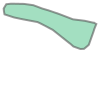

In [ ]:
tn_mines_exploded['geometry'].values[1]

In [ ]:
i=0

df_contructor = []
while i<=len(tn_mines_exploded):

    polygon = tn_mines_exploded['geometry'].values[i]

    # Extract the coordinates from the polygon
    coordinates = polygon.exterior.coords[:]

    # Create an ee.Geometry object from the coordinates
    polygon = ee.Geometry.MultiPolygon(coordinates)

    # Set the maxError parameter
    max_error = 1  # Specify your desired maxError value

    # Project the geometry coordinates
    projected_polygon = polygon.transform('EPSG:4326', max_error)

    #decrease scale to get more rows of data/granularity
    ac = dc.getRegion(projected_polygon, scale=200 ).getInfo()
    df_constructor =pd.DataFrame(ac)

    df_constructor.columns = df_constructor.iloc[0]
    df_constructor = df_constructor.tail(-1)
    df_constructor['company'] = tn_mines_exploded['company'].values[i]
    df_constructor['shapeName'] = tn_mines_exploded['shapeName'].values[i]
    df = df.append(df_constructor)

    print(tn_mines_exploded['company'].values[i])


    i+=1

COALCO INC
COALCO INC
COALCO INC
ENCOL INC
DEBCO COAL CO
DEBCO COAL CO
B + J EXCAVATING CO INC (TN)
B + J EXCAVATING CO INC (TN)
B + J EXCAVATING CO INC (TN)
CUMBERLAND COAL CO LLC
PREMIUM COAL CO. INC


EEException: ignored

In [ ]:
df['latitude'].unique()
df['longitude'].unique()

array([-84.53465725490561, -84.53438776032037, -84.53411826573513,
       -84.53384877114989, -84.53950815743985, -84.54031664119556,
       -84.54004714661032, -84.53977765202508, -84.53923866285461,
       -84.5405861357808, -84.53896916826938, -84.53869967368414,
       -84.53843017909891, -84.53816068451367, -84.53789118992843,
       -84.5376216953432, -84.53735220075797, -84.54085563036602,
       -84.53708270617273, -84.53681321158749, -84.53654371700226,
       -84.53627422241702, -84.53600472783178, -84.53492674949084,
       -84.53573523324654, -84.53546573866132, -84.53519624407608,
       -84.53357927656467, -84.53277079280895, -84.53955307320405,
       -84.53775644263581, -84.53595981206757, -83.9017492214792,
       -84.2790416408094, -84.27724501024115, -83.91432563545686,
       -84.75155548025626, -84.74975884968802, -84.20178652637512],
      dtype=object)

In [ ]:
df

,id,longitude,latitude,time,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,label,company,shapeName
1,20151112T163022_20151112T163020_T16SGF,-84.534657,36.295665,1447345820000,None,None,None,None,None,None,None,None,None,None,NaN,NaN
2,20151112T163022_20161226T042522_T16SGF,-84.534657,36.295665,1447345820463,None,None,None,None,None,None,None,None,None,None,NaN,NaN
3,20160111T162642_20160111T162638_T16SGF,-84.534657,36.295665,1452530233424,None,None,None,None,None,None,None,None,None,None,NaN,NaN
4,20160111T163713_20160111T183352_T16SGF,-84.534657,36.295665,1452530233424,None,None,None,None,None,None,None,None,None,None,NaN,NaN
5,20160609T162342_20160609T162514_T16SGF,-84.534657,36.295665,1465489514000,0.021395,0.732898,0.036293,0.019497,0.035048,0.0697,0.027627,0.029762,0.027587,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,20230603T161831_20230603T162341_T17SKA,-84.201787,36.188631,1685810002469,0.033427,0.379509,0.04873,0.027729,0.059575,0.04978,0.198725,0.045674,0.04271,1,PREMIUM COAL CO. INC,00000000000000000068
429,20230608T161829_20230608T162118_T16SGF,-84.201787,36.188631,1686242004920,None,None,None,None,None,None,None,None,None,None,PREMIUM COAL CO. INC,00000000000000000068
430,20230608T161829_20230608T162118_T17SKA,-84.201787,36.188631,1686242003529,None,None,None,None,None,None,None,None,None,None,PREMIUM COAL CO. INC,00000000000000000068
431,20230613T161831_20230613T162404_T16SGF,-84.201787,36.188631,1686674004190,0.030285,0.589926,0.042786,0.025086,0.056248,0.043115,0.077182,0.037601,0.037648,1,PREMIUM COAL CO. INC,00000000000000000068


In [ ]:
df['company'].unique()

array([nan, 'COALCO INC', 'ENCOL INC', 'DEBCO COAL CO',
       'B + J EXCAVATING CO INC (TN)', 'CUMBERLAND COAL CO LLC',
       'PREMIUM COAL CO. INC'], dtype=object)